<a href="https://colab.research.google.com/github/ALRIER/Class2023/blob/March2023_II/Regex%26TextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paquetería

In [1]:
!pip install pdftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.9 MB/s eta 0:00:00
  Created wheel for pdftools: filename=pdftools-2.0.2-py3-none-any.whl size=9403 sha256=9be55d895d208d97b02e6e72f587538aa8ad646ec5922201bd0701b41e72a8b5
  Stored in directory: /root/.cache/pip/wheels/35/24/93/3ddb996142e71d78e0105b52b590fab0b39a9f57750812c715
Successfully built pdftools


In [2]:
!pip install rpy2==3.5.1
!pip install pdfminer.six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318081 sha256=910450483d1ec9044d59a4c2d626941002583270cfe5dc04dfd77d23f96ead3e
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 29.3 MB/s eta 0:00:00


In [3]:
# activate R magic
%load_ext rpy2.ipython
     

In [4]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Instalar paquetes en R
packages = ["syuzhet", "stringr", "dplyr", "rtweet", "twitteR", "tibble", "pdftools","gsub", "quanteda", "tm", "stopwords", "RColorBrewer", "ggplot2", "wordcloud"]
utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages(robjects.StrVector(packages))



(as ‘lib’ is unspecified)











































































































































	‘/tmp/RtmpmYQV7I/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7ff19b58bbc0> [RTYPES.NILSXP]

In [5]:
%%R
require("tibble")
require("dplyr")
require("stringr")
require("syuzhet")
require("rtweet")
require("twitteR")
require("pdftools")
require("gsub")
require("quanteda")
require("tm")
require("stopwords")
require("RColorBrewer")
require("ggplot2")
require("wordcloud")



Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union





Attaching package: ‘rtweet’



    get_tokens



Attaching package: ‘twitteR’



    lookup_statuses



    id, location





Unicode version: 13.0
ICU version: 66.1





Attaching package: ‘NLP’



    meta, meta<-


Attaching package: ‘tm’



    stopwords



Attaching package: ‘stopwords’



    stopwords




Attaching package: ‘ggplot2’



    annotate





Este código me va a dar el largo de un conjunto de elementos. 

In [6]:
%%R

x = c("why", "video", "cross", "extra", "deal", "authority")
str_length(x)

[1] 3 5 5 5 4 9


In [7]:
x = ["why:P", "video", "cross", "extra", "deal", "authority"]
lengths = [len(i) for i in x]
print(lengths)

[5, 5, 5, 5, 4, 9]


In [8]:
%%R

concatenated = str_c(x, collapse= ", ")
concatenated 

[1] "why, video, cross, extra, deal, authority"


In [9]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
concatenated = ", ".join(x)
print(concatenated)

why, video, cross, extra, deal, authority


Ahora vamos a extraer una cadena de texto, en este caso vamos a crear un string para poder realizar la búsqueda y después vamos a identificar los patrones. 

In [10]:
%%R

word = "The best programing course ever!"
str_sub(string = word, start = 2, end = 20)

[1] "he best programing "


In [11]:
word = "The best programing course ever!"
substring = word[1:19]
print(substring)

he best programing


In [12]:
%%R

word = "En esto, le vino al pensamiento cómo le haría, y fue que rasgó una gran tira de las faldas de la camisa, que andaban colgando, y diole once ñudos, el uno más gordo que los demás, y esto le sirvió de rosario el tiempo que allí estuvo, donde rezó un millón de avemarí Y lo que le fatigaba mucho era no hallar por allí otro ermitaño que le confesase y con quien consolarse; y, se entretenía paseándose por el pradecillo, escribiendo y grabando por las cortezas de los árboles y por la menuda arena muchos versos, todos acomodados a su tristeza, y algunos en alabanza de Dulcinea."
str_extract_all(string = word, pattern = "[aeiou]") #Dentro de las commillas vá cualquier regex qe ustedes deseen buscar.

[[1]]
  [1] "e" "o" "e" "i" "o" "a" "e" "a" "i" "e" "o" "o" "e" "a" "a" "u" "e" "u"
 [19] "e" "a" "u" "a" "a" "i" "a" "e" "a" "a" "a" "e" "a" "a" "i" "a" "u" "e"
 [37] "a" "a" "a" "o" "a" "o" "i" "o" "e" "o" "e" "u" "o" "e" "u" "o" "o" "o"
 [55] "u" "e" "o" "e" "e" "o" "e" "i" "i" "e" "o" "a" "i" "o" "e" "i" "e" "o"
 [73] "u" "e" "a" "e" "u" "o" "o" "e" "e" "u" "i" "e" "a" "e" "a" "o" "u" "e"
 [91] "e" "a" "i" "a" "a" "u" "o" "e" "a" "o" "a" "a" "o" "a" "o" "o" "e" "i"
[109] "a" "o" "u" "e" "e" "o" "e" "a" "e" "o" "u" "i" "e" "o" "o" "a" "e" "e"
[127] "e" "e" "e" "a" "a" "e" "o" "e" "o" "e" "a" "e" "i" "o" "e" "i" "i" "e"
[145] "o" "a" "a" "o" "o" "a" "o" "e" "a" "e" "o" "o" "e" "o" "a" "e" "u" "a"
[163] "a" "e" "a" "u" "o" "e" "o" "o" "o" "a" "o" "o" "a" "o" "a" "u" "i" "e"
[181] "a" "a" "u" "o" "e" "a" "a" "a" "a" "e" "u" "i" "e" "a"



In [13]:
import re #rees el paquete de python que más se usa para analitica de textos, hay que tenerlo en cuenta. 

x = "The best programming course ever!"
a = re.findall("[aeiou]", x)
print(a)

['e', 'e', 'o', 'a', 'i', 'o', 'u', 'e', 'e', 'e']


Extraigo un conjunto de datos de una lista de elementos, vector o conjunto de datos. 

In [14]:
%%R

x = c("why", "video", "cross", "extra", "deal", "authority")
str_subset( string = x, pattern = "[aeiou]")

[1] "video"     "cross"     "extra"     "deal"      "authority"


In [15]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
output = [palabra for palabra in x if re.search("[aeiou]", palabra)]

print(output)

['video', 'cross', 'extra', 'deal', 'authority']


Contando la ubicación de un caracter que he decidido dentro de un conjunto de elementos, en este caso una lista o vector de elementos. 

In [16]:
%%R
x = c("why", "video", "cross", "extra", "deal", "authority")
str_count( string = x, pattern = "[aeiou]")

[1] 0 3 1 2 2 4


In [17]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
output = [len(re.findall("[aeiou]", s)) for s in x]
print(output)


[0, 3, 1, 2, 2, 4]


Ahora vamos a trabajar con valores de verdad

In [18]:
%%R
x = c("why", "video", "cross", "extra", "deal", "authority")
str_detect( string = x, pattern = "[aeiou]")

[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE


In [19]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
output = [bool(re.search("[aeiou]", s)) for s in x]
print(output)

[False, True, True, True, True, True]


Ahora vamos por un ejercicio un poco más real. 

In [20]:
%%R

data = mtcars
#Lo que hacemos aquí es simplemente cambiar el nombre de los vehículos a una columna independiente
data = data %>% rownames_to_column(var = "Model")
print(data%>% head())

              Model  mpg cyl disp  hp drat    wt  qsec vs am gear carb
1         Mazda RX4 21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
2     Mazda RX4 Wag 21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
3        Datsun 710 22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
4    Hornet 4 Drive 21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
5 Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
6           Valiant 18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


In [21]:
import pandas as pd
from statsmodels.datasets import get_rdataset
import seaborn as sns
data = sns.load_dataset('mpg')
data = data.reset_index().rename(columns={"name": "Model"})
print(data.head())

   index   mpg  cylinders  displacement  horsepower  weight  acceleration  \
0      0  18.0          8         307.0       130.0    3504          12.0   
1      1  15.0          8         350.0       165.0    3693          11.5   
2      2  18.0          8         318.0       150.0    3436          11.0   
3      3  16.0          8         304.0       150.0    3433          12.0   
4      4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                      Model  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [22]:
%%R
filtered_data <- data %>% filter(str_detect(string= Model, pattern = "(erc)"))
head(filtered_data)

       Model  mpg cyl  disp  hp drat   wt qsec vs am gear carb
1  Merc 240D 24.4   4 146.7  62 3.69 3.19 20.0  1  0    4    2
2   Merc 230 22.8   4 140.8  95 3.92 3.15 22.9  1  0    4    2
3   Merc 280 19.2   6 167.6 123 3.92 3.44 18.3  1  0    4    4
4  Merc 280C 17.8   6 167.6 123 3.92 3.44 18.9  1  0    4    4
5 Merc 450SE 16.4   8 275.8 180 3.07 4.07 17.4  0  0    3    3
6 Merc 450SL 17.3   8 275.8 180 3.07 3.73 17.6  0  0    3    3


In [23]:
filtered_data = data[data["Model"].str.contains("erc", flags=re.IGNORECASE)]
print(filtered_data.head())

     index   mpg  cylinders  displacement  horsepower  weight  acceleration  \
49      49  23.0          4         122.0        86.0    2220          14.0   
67      67  11.0          8         429.0       208.0    4633          11.0   
90      90  12.0          8         429.0       198.0    4952          11.5   
113    113  21.0          6         155.0       107.0    2472          14.0   
154    154  15.0          6         250.0        72.0    3432          21.0   

     model_year origin                     Model  
49           71    usa        mercury capri 2000  
67           72    usa           mercury marquis  
90           73    usa  mercury marquis brougham  
113          73    usa          mercury capri v6  
154          75    usa           mercury monarch  


In [24]:
%%R
x = c("why", "video", "cross", "extra", "deal", "authority")
str_replace( string = x, pattern = "[aeiou]", replacement = "  ")

[1] "why"        "v  deo"     "cr  ss"     "  xtra"     "d  al"     
[6] "  uthority"


In [25]:
x = ["why", "video", "cross", "extra", "deal", "authority"]
result = [re.sub("[aeiou]", "remplase por este texto", palabra) for palabra in x]
print(result)

['why', 'vremplase por este textodremplase por este textoremplase por este texto', 'crremplase por este textoss', 'remplase por este textoxtrremplase por este texto', 'dremplase por este textoremplase por este textol', 'remplase por este textoremplase por este textothremplase por este textorremplase por este textoty']


In [26]:
%%R
a = c("a,b", "c,d,e", "Hola", "Hola a todos")
str_split( string = a, pattern = ",")

[[1]]
[1] "a" "b"

[[2]]
[1] "c" "d" "e"

[[3]]
[1] "Hola"

[[4]]
[1] "Hola a todos"



In [27]:
a = ["a,b", "c,d,e", "Hola", "Hola a todos"]
split_a = [re.split(",", x) for x in a]
print(split_a)

[['a', 'b'], ['c', 'd', 'e'], ['Hola'], ['Hola a todos']]


#Importación libro

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [29]:
from pdfminer.high_level import extract_text

with open('/content/drive/MyDrive/Databases/Entendiendo-correctamente-el-libertarismo.pdf', 'rb') as pdf_file:
    libro = extract_text(pdf_file)

print(libro[1:2000])


ntendiendo 
correctamente el 
libertarismo 
Hans-Hermann Hoppe 

CENTRO MISES

 
 
Entendiendo 
correctamente el 
libertarismo 

Introducción 

Los escritos recogidos en este libro son en su mayoría 
la  Property  and 
discursos  realizados  en  Bodrum  en 
Freedom Society, de la cual el profesor Hoppe es fundador 
y  presidente.  Tuve  la  suerte  de  escuchárselos  leer  en  la 
reunión, y me siento profundamente honrado de que me 
hayan  pedido  que  presente  una 
las 
versiones publicadas. 

introducción  a 

Voy  a  dividir  mi  Introducción  en  tres  secciones. 
Primero, daré una breve descripción de los primeros años 
de  vida  y  el  desarrollo  intelectual  de  Hoppe.  Segundo, 
escribiré  más  extensamente  sobre  el  trabajo  académico 
que  lo  ha  colocado a  la  cabeza  del  movimiento  libertario 
internacional.  Tercero,  explicaré  el  tema  o  los  temas 
principales que derivan de la presente colección. 

- 3 - 

 
 
 
 
Hoppe:  El  niño  del  asentamiento  de  

#Ahora trabajemos sobre python. 

In [30]:
# Importar biblioteca tweepy
import tweepy

# Configurar credenciales de Twitter API
consumer_key = "6gMch1lkCfn3W5PZho3X4jh8W"
consumer_secret = "eBosfeWmQVBLQ87WiVMaRXousYRdyOkyhLkvCUzw7ioz0EMCWY"
access_token = "284827529-UENNMA2jVHCRBYwcddd6obAAZvaJ0hUVSapYYmwZ"
access_secret = "sb1fgjDG9CSugsU5qsWJWkBOvP91FxJmcm7hKCyajrndT"

# Autenticar con la API de Twitter
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_secret
)

# Crear objeto API de tweepy
api = tweepy.API(auth)

# Realizar una solicitud a la API de Twitter
public_tweets = api.user_timeline(screen_name="elonmusk", count=100)

# Iterar sobre los tweets y obtener el texto
tweet_text = [tweet.text for tweet in public_tweets]
tweet_text


['@PicturesFoIder True',
 '@aaronsibarium This is crazy – lives are on the line!\n\nThe woke mind virus is a parasite that kills its host. It must be eliminated.',
 '@WholeMarsBlog It’s not like we didn’t see it coming',
 '@shellenberger Why indeed. \n\nIf someone wants to change something about themselves as an adult, we should respect t… https://t.co/9QjoQiU9C4',
 'RT @Starlink: Starlink helping to connect schools in Rwanda 🛰️🇷🇼',
 '@MarioNawfal @DavidSacks Citizen journalism breaks the monopoly held by a handful of editors – they naturally don’t like that',
 '@EvasTeslaSPlaid Yeah',
 '@America1stLegal “Total crock”',
 '@America1stLegal How did The Washington Post go from questioning the state to being its mouthpiece?',
 '@America1stLegal Major problem',
 '@America1stLegal @snopes @DailyCaller What say you, @snopes?',
 '@America1stLegal 🧐',
 '@America1stLegal This is indeed very disturbing',
 '@IAPolls2022 Interesting',
 'RT @Teslaconomics: AKA, don’t pull out. @elonmusk https://t.co

A partir del avance que has compartido, lo siguiente sería guardar la información de los tweets en un DataFrame utilizando la librería pandas.

Para ello vamos a crear un diccionario con las columnas que deseas incluir en el DataFrame y la información de los tweets:

In [31]:
tweet_dict = {
    "ID": [tweet.id for tweet in public_tweets],
    "Fecha": [tweet.created_at for tweet in public_tweets],
    "Texto": [tweet.text for tweet in public_tweets],
    "Usuario": [tweet.user.screen_name for tweet in public_tweets],
    "Seguidores": [tweet.user.followers_count for tweet in public_tweets],
    "Likes": [tweet.favorite_count for tweet in public_tweets],
    "Retweets": [tweet.retweet_count for tweet in public_tweets],
    "Favorited": [tweet.favorited for tweet in public_tweets],
    "Retweeted": [tweet.retweeted for tweet in public_tweets]
}

In [32]:
import pandas as pd
tweet_df = pd.DataFrame(tweet_dict)
tweet_df.head()

,ID,Fecha,Texto,Usuario,Seguidores,Likes,Retweets,Favorited,Retweeted
0,1661789086624149505,2023-05-25 17:39:27+00:00,@PicturesFoIder True,elonmusk,140904180,1776,82,False,False
1,1661783767646867456,2023-05-25 17:18:19+00:00,@aaronsibarium This is crazy – lives are on th...,elonmusk,140904180,1419,279,False,False
2,1661776228079243264,2023-05-25 16:48:21+00:00,@WholeMarsBlog It’s not like we didn’t see it ...,elonmusk,140904180,2965,237,False,False
3,1661764602491699203,2023-05-25 16:02:09+00:00,@shellenberger Why indeed. \n\nIf someone want...,elonmusk,140904180,5509,932,False,False
4,1661762152976269312,2023-05-25 15:52:25+00:00,RT @Starlink: Starlink helping to connect scho...,elonmusk,140904180,0,808,False,False


Esta línea de código quita signos de puntuación, números, symbolos, quita URLs, separadores, entre otros pero además, deja el documento separado en tokens.

#Analizando documentos de texto en python. 

In [33]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

# Remove mentions, urls, emojis, numbers, punctuation, etc.
text = re.sub(r"@\w+", "", libro)
text = re.sub(r"https?://\S+", "", text)
text = re.sub(r"\d+\w*\d*", "", text)
text = re.sub(r"#\w+", "", text)
text = re.sub(r"[^\x01-\x7F]", "", text)
text = re.sub(r"[^\w\s]", " ", text)

# Remove spaces and newlines
text = re.sub(r"\n", " ", text)
text = re.sub(r"^\s+|\s+$", "", text)
text = re.sub(r"[ \t]+", " ", text)

# Second round of cleaning
# Remove "rt"
text = re.sub(r"rt", "", text)
# Remove "@username"
text = re.sub(r"@\w+", "", text)
# Remove punctuation
text = re.sub(r"[^\w\s]", "", text)
# Remove numbers
text = re.sub(r"\d", "", text)
# Remove links (http)
text = re.sub(r"http\w+", "", text)
# Remove tabs
text = re.sub(r"[ \t]{2,}", "", text)
# Remove blank spaces at the beginning and end
text = re.sub(r"^ | $", "", text)
# Remove unusual characters
text = re.sub(r"[^\x01-\x7F]", "", text)
# Convert to lowercase
text = text.lower()

# Dividir el texto en palabras
tokens = word_tokenize(text)
# Remover caracteres de puntuación
tokens = [token for token in tokens if token.isalnum()]
# Remover símbolos
tokens = [token for token in tokens if token.isalpha()]
# Remover números
tokens = [token for token in tokens if not token.isdigit()]
# Imprimir los primeros 10 tokens
print(tokens[:100])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['entendiendo', 'correctamente', 'el', 'libearismo', 'hans', 'hermann', 'hoppe', 'centro', 'mises', 'entendiendo', 'correctamente', 'el', 'libearismo', 'introduccin', 'los', 'escritos', 'recogidos', 'en', 'este', 'libro', 'son', 'en', 'su', 'mayora', 'la', 'propey', 'and', 'discursos', 'realizados', 'en', 'bodrum', 'en', 'freedom', 'society', 'de', 'la', 'cual', 'el', 'profesor', 'hoppe', 'es', 'fundador', 'y', 'presidente', 'tuve', 'la', 'suee', 'de', 'escuchrselos', 'leer', 'en', 'la', 'reunin', 'y', 'me', 'siento', 'profundamente', 'honrado', 'de', 'que', 'me', 'hayan', 'pedido', 'que', 'presente', 'una', 'las', 'versiones', 'publicadas', 'introduccin', 'a', 'voy', 'a', 'dividir', 'mi', 'introduccin', 'en', 'tres', 'secciones', 'primero', 'dar', 'una', 'breve', 'descripcin', 'de', 'los', 'primeros', 'aos', 'de', 'vida', 'y', 'el', 'desarrollo', 'intelectual', 'de', 'hoppe', 'segundo', 'escribir', 'ms', 'extensamente']


Hasta ahora ya tenemos todo el documento listo y separado en palabras para poder trabajarlo y así poder desarrollar diferentes análisis... cada étapa no es consecutiva y se puede ir hacia adelante y hacá atras entre ellas para poder comprender o modificar diferentes procesos. 

#retirar stopwords del documento Python.
Bien sea stopwords seleccionadas o un diccionario de stopwords completo. 

In [34]:

nltk.download('stopwords')
from nltk.corpus import stopwords

discurso = ' '.join(tokens)

# Additional words and patterns to remove
words_to_remove = [
    "hp2pdfmnfa", "@iandresrm", "va", "https://", "@", ":", "…", "t.co/", "👁",
    "@christi11079874", "📢", "jajajajjaja", "“", "n", "cad…", "@lafm", "plat…",
    "…", "indra", "dos", "día", "🇨🇴", "de", "la", "aos", "el", "y", "las", "nes",
    "ser"
]

# Remove additional words and patterns
for word in words_to_remove:
    discurso = discurso.replace(word, '')

# Remove unwanted characters and spaces
discurso = re.sub(r"[^\w\s]", "", discurso)
discurso = re.sub(r"\s+", " ", discurso).strip()

# Print the cleaned text
print(discurso)

etediedo correctamete libearismo has herma hoppe cetro mises etediedo correctamete libearismo itroducci los escritos recogi e este libro so e su maora prope ad discursos realiza e bodrum e freedom societ cual profesor hoppe es fudador presite tuve suee escuchrsos leer e reui me sieto profudamete horado que me haa pedido que presete ua s versioes publicadas itroducci a vo a dividir mi itroducci e tres seccioes primero dar ua breve scripci los primeros vida sarrollo itectual hoppe segudo escribir ms extesamete sobre trabajo acadmico que lo ha colocado a cabeza l movimieto libeario iteracioal tercero explicar tema o los temas pricipales que ri presete colecci hoppe io l asetamieto alemaia occital has herma hoppe aci septiembre e peie ua ciudad e sector britico alemaia ocupada spus asistir a rias escues locales primero fue a uiversidad saard e saarbrcke s aqu se trasd a uiversidad goethe e frakfu do estudi co otable eo marxista jrge habermas quie tambi actu como asesor pricipal tesis docto

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Todo el proceso de tratamiento de datos sobre R

In [35]:
from pdfminer.high_level import extract_text
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Configurar la conversión automática de objetos de pandas a R
pandas2ri.activate()


In [36]:
# Crear una instancia de R
r = robjects.r

# Transferir la variable text a R
r.assign('libror', libro)

'Entendiendo \ncorrectamente el \nlibertarismo \n...


In [37]:
%%R 
libror[1]

[1] "Entendiendo \ncorrectamente el \nlibertarismo \nHans-Hermann Hoppe \n\nCENTRO MISES\n\n \n \n\f\fEntendiendo \ncorrectamente el \nlibertarismo \n\nIntroducción \n\nLos escritos recogidos en este libro son en su mayoría \nla  Property  and \ndiscursos  realizados  en  Bodrum  en \nFreedom Society, de la cual el profesor Hoppe es fundador \ny  presidente.  Tuve  la  suerte  de  escuchárselos  leer  en  la \nreunión, y me siento profundamente honrado de que me \nhayan  pedido  que  presente  una \nlas \nversiones publicadas. \n\nintroducción  a \n\nVoy  a  dividir  mi  Introducción  en  tres  secciones. \nPrimero, daré una breve descripción de los primeros años \nde  vida  y  el  desarrollo  intelectual  de  Hoppe.  Segundo, \nescribiré  más  extensamente  sobre  el  trabajo  académico \nque  lo  ha  colocado a  la  cabeza  del  movimiento  libertario \ninternacional.  Tercero,  explicaré  el  tema  o  los  temas \nprincipales que derivan de la presente colección. \n\n- 3 - \n\n \n \

#Twitter sore R

In [38]:
%%R

setup_twitter_oauth("6gMch1lkCfn3W5PZho3X4jh8W",#api key
                    "eBosfeWmQVBLQ87WiVMaRXousYRdyOkyhLkvCUzw7ioz0EMCWY",#api secret key
                    "284827529-UENNMA2jVHCRBYwcddd6obAAZvaJ0hUVSapYYmwZ",#acces token
                    "sb1fgjDG9CSugsU5qsWJWkBOvP91FxJmcm7hKCyajrndT")#acces token secret

[1] "Using direct authentication"
Use a local file ('.httr-oauth'), to cache OAuth access credentials between R sessions?

1: Yes
2: No

Selection: 1


In [39]:
%%R

a = searchTwitter("Nike", n=50)
a[1:10]

[[1]]
[1] "_ayoliadi: RT @jiggyblocc_ng: Nike SB Dunk Low Pro Now available in store\n\nSize 38-45‼️‼️‼️\n🏷️36k\n🏷️Nationwide delivery 🚚 \n\nSend a dm or WhatsApp: htt…"

[[2]]
[1] "703_richie: RT @JustFreshKicks: Available via Snipes\nNike Dunk Low SE Patchwork 'If Lost'\n=&gt; https://t.co/cxUVgmzeHD https://t.co/nuYI1hOMRH"

[[3]]
[1] "703_richie: RT @SneakerShouts: Nike Dunk Low Remastered \"White Gum\" \n\nBUY HERE: https://t.co/E71mx4h4He https://t.co/PhjcHO4HnM"

[[4]]
[1] "Rello_419: RT @RTNBA: Nike released Ja Morant’s 1 “Hunger” this morning and it sold out within 4 minutes despite the latest backlash, per @TMZ_Sports…"

[[5]]
[1] "Bossz_dj: RT @bestoffshoes: Nike Club https://t.co/qzHMHurDpq"

[[6]]
[1] "celiaa_sncheezz: RT @JustFreshKicks: Restocked via Nike US 🌪\nAir Jordan 1 High OG 'Stealth'\n=&gt; https://t.co/HpqbwRQkBT https://t.co/n983n7IhbS"

[[7]]
[1] "Smileyjanee: RT @indiKEV: NIKE HAS BEEN SECRETLY FUNDING THE RESELL MARKET LIKE RAEGAN DID THE WAR ON DRUGS"

[[8]

In [40]:
%%R

nike=twListToDF(a)

In [41]:
%%R

nike %>% head()

                                                                                                                                            text
1 RT @jiggyblocc_ng: Nike SB Dunk Low Pro Now available in store\n\nSize 38-45‼️‼️‼️\n🏷️36k\n🏷️Nationwide delivery 🚚 \n\nSend a dm or WhatsApp: htt…
2          RT @JustFreshKicks: Available via Snipes\nNike Dunk Low SE Patchwork 'If Lost'\n=&gt; https://t.co/cxUVgmzeHD https://t.co/nuYI1hOMRH
3                          RT @SneakerShouts: Nike Dunk Low Remastered "White Gum" \n\nBUY HERE: https://t.co/E71mx4h4He https://t.co/PhjcHO4HnM
4    RT @RTNBA: Nike released Ja Morant’s 1 “Hunger” this morning and it sold out within 4 minutes despite the latest backlash, per @TMZ_Sports…
5                                                                                            RT @bestoffshoes: Nike Club https://t.co/qzHMHurDpq
6             RT @JustFreshKicks: Restocked via Nike US 🌪\nAir Jordan 1 High OG 'Stealth'\n=&gt; https://t.co/HpqbwRQkBT https

Ahora usando rtweet

In [42]:
%%R

create_token(app="Clase_big_data",
             consumer_key = "6gMch1lkCfn3W5PZho3X4jh8W",#api key
             consumer_secret = "eBosfeWmQVBLQ87WiVMaRXousYRdyOkyhLkvCUzw7ioz0EMCWY",#api secret key
             access_token ="284827529-UENNMA2jVHCRBYwcddd6obAAZvaJ0hUVSapYYmwZ",#acces token
             access_secret ="sb1fgjDG9CSugsU5qsWJWkBOvP91FxJmcm7hKCyajrndT")#acces token secret

Saving auth to '/root/.config/R/rtweet/create_token.rds'


In [43]:
%%R

Elon <- get_timeline(user = "@AlvaroUribeVel", n = 100, parse = TRUE, check = FALSE)

In [44]:
%%R 

Elon %>% head()

# A tibble: 6 × 43
  created_at               id id_str      text  full_text truncated entities    
  <dttm>                <dbl> <chr>       <chr> <chr>     <lgl>     <list>      
1 2023-05-25 17:05:53 1.66e18 1661780638… "Juá… "Juán Ma… FALSE     <named list>
2 2023-05-25 02:28:26 1.66e18 1661559819… "Int… "Interve… FALSE     <named list>
3 2023-05-24 23:10:58 1.66e18 1661510129… "RT … "RT @CeD… FALSE     <named list>
4 2023-05-24 12:19:42 1.66e18 1661346233… "Dan… "Daniel … FALSE     <named list>
5 2023-05-23 23:50:35 1.66e18 1661157709… "Dan… "Daniel … FALSE     <named list>
6 2023-05-23 20:27:47 1.66e18 1661106672… "¿Po… "¿Por qu… FALSE     <named list>
# ℹ 36 more variables: source <chr>, in_reply_to_status_id <dbl>,
#   in_reply_to_status_id_str <chr>, in_reply_to_user_id <int>,
#   in_reply_to_user_id_str <chr>, in_reply_to_screen_name <chr>, geo <list>,
#   coordinates <list>, place <list>, contributors <lgl>,
#   is_quote_status <lgl>, retweet_count <int>, favorite_count <int

#procesamiento en R

In [45]:
%%R

elontext = Elon$text

In [46]:
%%R
elontext

 [1] "Juán Manuel Quintero Villada falleció en Rionegro, Antioquia. Siempre acompañó la lucha. Solidaridad familia, dr Rubén Darío, Senador Esteban"                                                                                                                                                                                                
 [2] "Intervención en la audiencia de preclusión- Argumentos respecto de la apelación presentada por la Fiscalía\n\nhttps://t.co/Ws6gj20gLM"                                                                                                                                                                                                        
 [3] "RT @CeDemocratico: Compartimos enlace de la intervención del doctor Jaime Granados en la audiencia de preclusión del expresidente Álvaro Ur…"                                                                                                                                                                           

In [47]:
%%R

#Now i will split the text in words to analyse each one of them separated
tokens<-tokens(elontext ,what = "word",remove_punct = TRUE,remove_symbols =TRUE,remove_numbers =TRUE,remove_url =TRUE,remove_separators =TRUE,split_hyphens =TRUE)


In [48]:
%%R
tokens

Tokens consisting of 98 documents.
text1 :
 [1] "Juán"      "Manuel"    "Quintero"  "Villada"   "falleció"  "en"       
 [7] "Rionegro"  "Antioquia" "Siempre"   "acompañó"  "la"        "lucha"    
[ ... and 7 more ]

text2 :
 [1] "Intervención" "en"           "la"           "audiencia"    "de"          
 [6] "preclusión"   "Argumentos"   "respecto"     "de"           "la"          
[11] "apelación"    "presentada"  
[ ... and 3 more ]

text3 :
 [1] "RT"             "@CeDemocratico" "Compartimos"    "enlace"        
 [5] "de"             "la"             "intervención"   "del"           
 [9] "doctor"         "Jaime"          "Granados"       "en"            
[ ... and 8 more ]

text4 :
 [1] "Daniel"     "Coronell"   "cree"       "que"        "como"      
 [6] "dejaron"    "prescribir" "y"          "quedó"      "en"        
[11] "la"         "impunidad" 
[ ... and 15 more ]

text5 :
 [1] "Daniel"       "Coronell"     "y"            "Julio"        "Sánchez"     
 [6] "ya"           "habí

In [49]:
%%R

#I will clean the words 
# Remove mentions, urls, emojis, numbers, punctuation, etc.
text <- gsub("@\\w+", "", tokens)
text <- gsub("https?://.+", "", text)
text <- gsub("\\d+\\w*\\d*", "", text)
text <- gsub("#\\w+", "", text)
text <- gsub("[^\x01-\x7F]", "", text)
text <- gsub("[[:punct:]]", " ", text)
# Remove spaces and newlines
text <- gsub("\n", " ", text)
text <- gsub("^\\s+", "", text)
text <- gsub("\\s+$", "", text)
text <- gsub("[ |\t]+", " ", text)
#Now i will make a second "cleaning" round, just to be sure.
# remove rt
x = gsub("rt", "", text)
# remove at
x = gsub("@\\w+", "", x)
# remove punctuation
x = gsub("[[:punct:]]", "", x)
# remove numbers (pilas con esta porque a veces los númers son útiles)
x = gsub("[[:digit:]]", "", x)
# remove links http
x = gsub("http\\w+", "", x)
# remove tabs
x = gsub("[ |\t]{2,}", "", x)
# remove blank spaces at the beginning
x = gsub("^ ", "", x)
# remove blank spaces at the end
x = gsub(" $", "", x)
#more unusual characters 
a<-gsub("[^\x01-\x7F]", "", x)
#NON CAPITAL LETTERS (Convertimos todo a minúsculas.)
discurso <- tolower(a)
a[1:100]

  [1] "Jun"           "Manuel"        "Quintero"      "Villada"      
  [5] "falleci"       "en"            "Rionegro"      "Antioquia"    
  [9] "Siempre"       "acompa"        "la"            "lucha"        
 [13] "Solidaridad"   "familia"       "dr"            "Rubn"         
 [17] "Daro"          "Senador"       "Esteban"       "Intervencin"  
 [21] "en"            "la"            "audiencia"     "de"           
 [25] "preclusin"     "Argumentos"    "respecto"      "de"           
 [29] "la"            "apelacin"      "presentada"    "por"          
 [33] "la"            "Fiscala"       "RT"            ""             
 [37] "Compaimos"     "enlace"        "de"            "la"           
 [41] "intervencin"   "del"           "doctor"        "Jaime"        
 [45] "Granados"      "en"            "la"            "audiencia"    
 [49] "de"            "preclusin"     "del"           "expresidente" 
 [53] "lvaro"         "Ur"            "Daniel"        "Coronell"     
 [57] "cree"        

In [50]:
%%R
#remove stopwords (quito las stopwords("spanish").)
discurso <- removeWords(discurso, words = stopwords("spanish"))
discurso <- removeWords(discurso, words = c("salud","@iandresrm","va","https://","@",":",
                                            "…","t.co/","👁","@christi11079874","📢","jajajajjaja",
                                            "“","n","cad…","@lafm","plat…",
                                            "…", "indra","dos","día","🇨🇴",
                                            "de","la","aos","el","y","las","nes",
                                            "ser",""))
#Remove punctuation (Nos deshacemos de la puntuación) 
discurso <- removePunctuation(discurso)
#Remove numbers (removemos los números) 
discurso <- removeNumbers(discurso)
#confirmation
discurso[1:100]

  [1] "jun"           "manuel"        "quintero"      "villada"      
  [5] "falleci"       ""              "rionegro"      "antioquia"    
  [9] "siempre"       "acompa"        ""              "lucha"        
 [13] "solidaridad"   "familia"       "dr"            "rubn"         
 [17] "daro"          "senador"       "esteban"       "intervencin"  
 [21] ""              ""              "audiencia"     ""             
 [25] "preclusin"     "argumentos"    "respecto"      ""             
 [29] ""              "apelacin"      "presentada"    ""             
 [33] ""              "fiscala"       "rt"            ""             
 [37] "compaimos"     "enlace"        ""              ""             
 [41] "intervencin"   ""              "doctor"        "jaime"        
 [45] "granados"      ""              ""              "audiencia"    
 [49] ""              "preclusin"     ""              "expresidente" 
 [53] "lvaro"         "ur"            "daniel"        "coronell"     
 [57] "cree"        

#Ahora tratamiento de matrices en R

In [51]:
%%R

# Create a Corpus
discurso1 <- Corpus(VectorSource(discurso)) 

# Create a Term-Document Matrix
letras <- TermDocumentMatrix(discurso1)
letrasmatrix <- as.matrix(letras) 

In [52]:
%%R

# Calculate word frequencies
vector <- rowSums(letrasmatrix) 
Vectorr <- sort(vector, decreasing = TRUE)

dataletras <- data.frame(word= names(Vectorr),freq=Vectorr) 
dataletras%>%head(100)

                       word freq
laboral             laboral   16
consulta           consulta   14
neiva                 neiva   11
sistema             sistema   10
firmas               firmas   10
bogot                 bogot   10
huila                 huila   10
popular             popular    9
invitamos         invitamos    9
pensional         pensional    8
solidaridad     solidaridad    7
daniel               daniel    7
medelln             medelln    7
drogas               drogas    7
reforma             reforma    7
colombia           colombia    7
consultas         consultas    7
siguiente         siguiente    7
familia             familia    6
recoleccin       recoleccin    6
reformas           reformas    6
ahora                 ahora    6
uribe                 uribe    6
centro               centro    6
pensiones         pensiones    6
enlace               enlace    5
eps                     eps    5
firmar               firmar    5
gobierno           gobierno    5
mancuso   

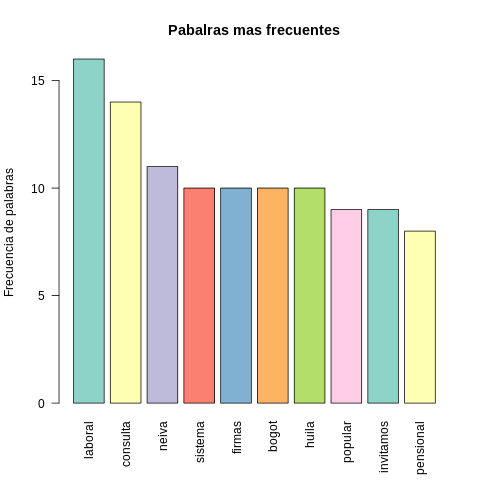

In [53]:
%%R

barplot(dataletras[1:10,]$freq, las = 2, names.arg = dataletras[1:10,]$word, 
        col = brewer.pal(n = 8, name = "Set3"), main ="Pabalras mas frecuentes",
        ylab = "Frecuencia de palabras") 

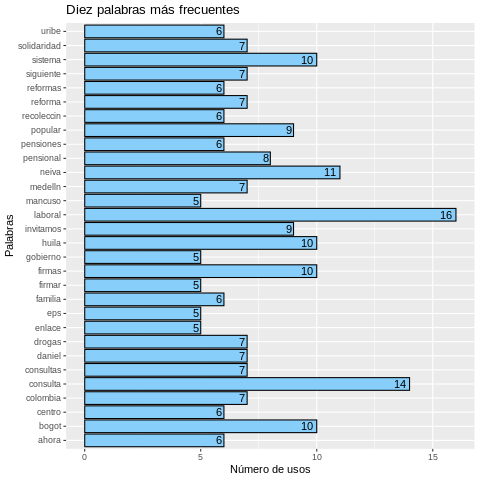

In [54]:
%%R

dataletras[1:30, ] %>%
   ggplot(aes(word, freq)) +
   geom_bar(stat = "identity", color = "black", fill = "#87CEFA") +
   geom_text(aes(hjust = 1.3, label = freq))+ 
   coord_flip() + 
   labs(title = "Diez palabras más frecuentes",  x = "Palabras", y = "Número de usos")

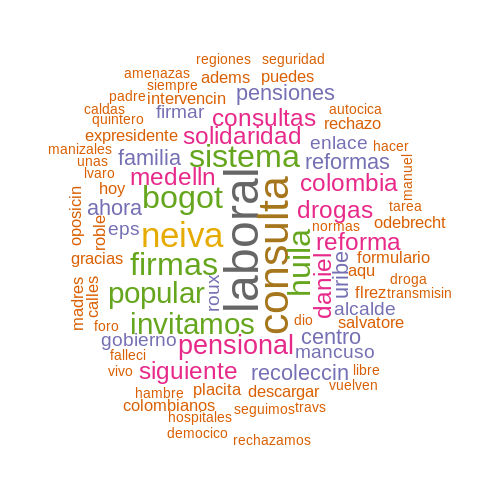

In [55]:
%%R

#nube de palabras sin frecuencias mínimas
wordcloud(
   words = dataletras$word, freq = dataletras$freq,
   max.words = 80, 
   random.order = F, 
   colors=brewer.pal(name = "Dark2", n = 8)
)

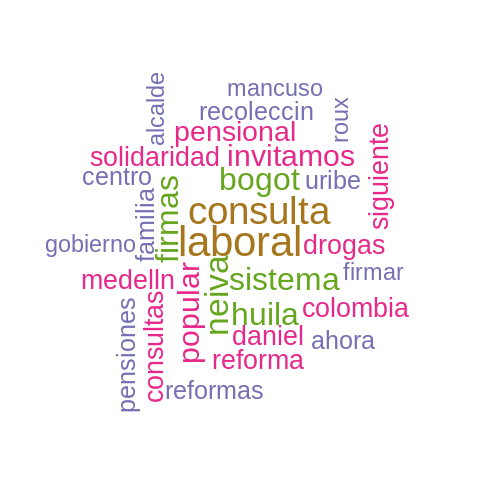

In [56]:
%%R

#nube de palabras con frecuencias mónimas
wordcloud(words = dataletras$word, freq = dataletras$freq, min.freq = 2,
          max.words=30, random.order=FALSE, rot.per=0.35,  
          colors=brewer.pal(7, "Dark2"), scale=c(3.5,1.25))

In [57]:
%%R

# Eliminar términos dispersos
nov_new <- removeSparseTerms(letras, sparse = 0.9999999999999922)

In [58]:
%%R
# Convertir en matriz y normalizar los valores
nov_new <- as.matrix(nov_new)
nov_new <- nov_new / rowSums(nov_new)

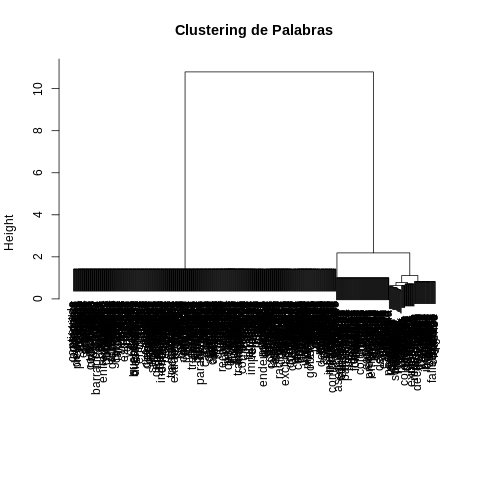

In [59]:
%%R

# Calcular la distancia entre los términos
nov_dist <- dist(nov_new, method = "euclidean")

# Realizar el clustering jerárquico
nov_hclust <- hclust(nov_dist, method = "ward.D")

# Graficar el dendrograma
plot(nov_hclust, main = "Clustering de Palabras", sub = "", xlab = "")


# Ahora vamos a hacer un análisis de sentimientos

In [74]:
%%R
#now i will get the sentiments
sentimientos_df = get_nrc_sentiment(elontext, lang="english")
#now i will print the "head()" to see if everything is ok. 
sentimientos_df


   anger anticipation disgust fear joy sadness surprise trust negative positive
1      0            0       0    0   0       0        0     0        0        0
2      0            0       0    0   0       0        0     0        0        0
3      0            0       0    0   0       0        0     1        0        1
4      0            0       0    0   0       0        0     0        0        0
5      0            0       0    0   0       0        0     0        0        0
6      0            0       0    0   0       0        0     0        0        0
7      1            0       1    1   0       1        0     0        1        0
8      0            0       0    0   0       0        0     1        0        1
9      0            0       0    0   0       0        0     0        0        0
10     0            0       0    0   0       0        0     0        0        0
11     0            0       0    0   0       0        0     0        0        0
12     0            0       0    0   0  

In [75]:
%%R
#now i will make my summary to see the results. 
summary =summary(sentimientos_df)

summary

     anger          anticipation        disgust             fear        
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.07143   Mean   :0.03061   Mean   :0.09184   Mean   :0.08163  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      joy       sadness           surprise     trust            negative      
 Min.   :0   Min.   :0.00000   Min.   :0   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0   1st Qu.:0.00000   1st Qu.:0   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0   Median :0.00000   Median :0   Median :0.00000   Median :0.00000  
 Mean   :0   Mean   :0.07143   Mean   :0   Mean   :0.07143   Mean   :0.09184  
 3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :0   Ma

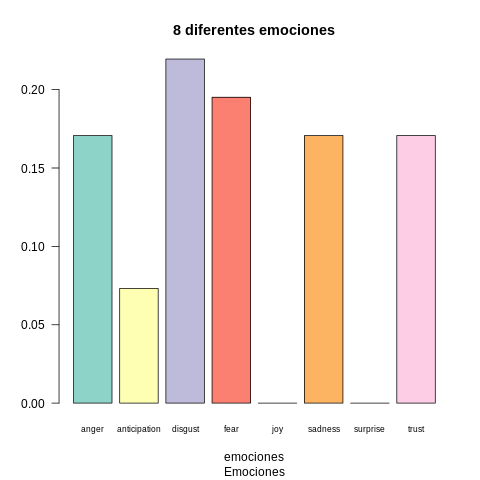

In [76]:
%%R
#graphic emotions
barplot(
  colSums(prop.table(sentimientos_df[, 1:8])),
  space = 0.2,
  horiz = F,
  las = 1,
  cex.names = 0.7,
  col = brewer.pal(n = 8, name = "Set3"),
  main = "8 diferentes emociones",
  sub = "Emociones",
  xlab="emociones", ylab = NULL)


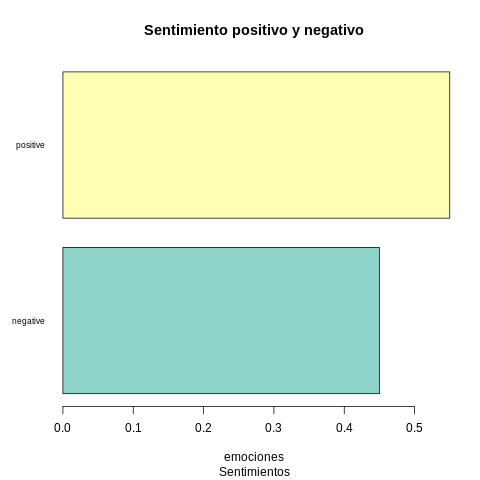

In [77]:
%%R

#graphic sentiments
barplot(
  colSums(prop.table(sentimientos_df[, 9:10])),
  space = 0.2,
  horiz = T,
  las = 1,
  cex.names = 0.7,
  col = brewer.pal(n = 2, name = "Set3"),
  main = "Sentimiento positivo y negativo",
  sub = "Sentimientos",
  xlab="emociones", ylab = NULL)

In [94]:
%%R

palabras_tristeza = elontext[sentimientos_df$sadness> 0]
palabras_tristeza_orden <- sort(table(unlist(palabras_tristeza)),decreasing = TRUE)
palabras_tristeza_orden %>% head()


[1] 1 1 1 1 1 1


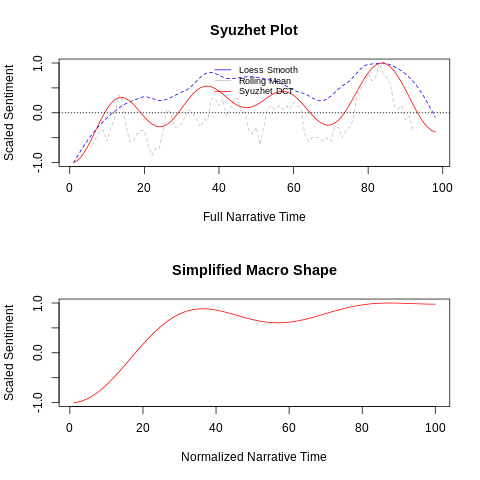

In [71]:
%%R

#Now, in a graphic i will draw the way in which the dialog has changed between 
#positive sentiments and negative ones
sentimientos_valencia = (sentimientos_df$negative *-1)+sentimientos_df$positive
simple_plot(sentimientos_valencia)

En este caso, el código funciona de la siguiente manera:

1. Se importa la biblioteca TextBlob para utilizar sus funcionalidades.
2. Se obtiene el texto de los tweets y se almacena en la lista tweet_text.
3. Se crea una lista vacía sentiments para almacenar los resultados del análisis de sentimiento.
4. Se itera sobre cada tweet en la lista tweet_text.
5. Para cada tweet, se crea un objeto TextBlob pasando el texto del tweet como argumento.
6. Se utiliza el método sentiment.polarity del objeto TextBlob para obtener la polaridad del sentimiento del tweet. Este método devuelve un valor numérico en el rango de -1 a 1, donde valores cercanos a -1 indican sentimientos negativos, valores cercanos a 1 indican sentimientos positivos, y valores cercanos a 0 indican sentimientos neutros.
7. El valor de polaridad del sentimiento se agrega a la lista sentiments.
8. Finalmente, se imprime el resultado del análisis de sentimiento para cada tweet, mostrando el número de tweet y su respectiva polaridad del sentimiento.

El algoritmo de TextBlob utiliza un conjunto de características lingüísticas y un modelo de aprendizaje automático entrenado previamente para realizar la clasificación del sentimiento en positivo, negativo o neutral.Es algo similar a lo que hemos visto previamente con el paquete Syuzhet de R. 

In [95]:
# Importar bibliotecas
from textblob import TextBlob

# Obtener el texto de los tweets
tweet_text = [tweet.text for tweet in public_tweets]

# Realizar análisis de sentimiento en cada tweet
sentiments = []
for text in tweet_text:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Imprimir los resultados
for i, sentiment in enumerate(sentiments):
    print(f"Tweet {i+1}: Sentimiento = {sentiment}")


Tweet 1: Sentimiento = 0.35
Tweet 2: Sentimiento = -0.75
Tweet 3: Sentimiento = 0.0
Tweet 4: Sentimiento = 0.15000000000000002
Tweet 5: Sentimiento = 0.0
Tweet 6: Sentimiento = 0.1
Tweet 7: Sentimiento = 0.0
Tweet 8: Sentimiento = 0.0
Tweet 9: Sentimiento = 0.0
Tweet 10: Sentimiento = 0.0625
Tweet 11: Sentimiento = 0.0
Tweet 12: Sentimiento = 0.0
Tweet 13: Sentimiento = -0.65
Tweet 14: Sentimiento = 0.5
Tweet 15: Sentimiento = 0.0
Tweet 16: Sentimiento = 0.0
Tweet 17: Sentimiento = -0.5
Tweet 18: Sentimiento = 0.0
Tweet 19: Sentimiento = 0.0
Tweet 20: Sentimiento = 0.0
Tweet 21: Sentimiento = 0.0
Tweet 22: Sentimiento = 0.0
Tweet 23: Sentimiento = 0.1
Tweet 24: Sentimiento = 0.0
Tweet 25: Sentimiento = 0.0
Tweet 26: Sentimiento = 0.25
Tweet 27: Sentimiento = 0.0
Tweet 28: Sentimiento = 0.13636363636363635
Tweet 29: Sentimiento = 0.4
Tweet 30: Sentimiento = 0.4
Tweet 31: Sentimiento = 0.0
Tweet 32: Sentimiento = 0.3375
Tweet 33: Sentimiento = 0.06666666666666667
Tweet 34: Sentimiento = 

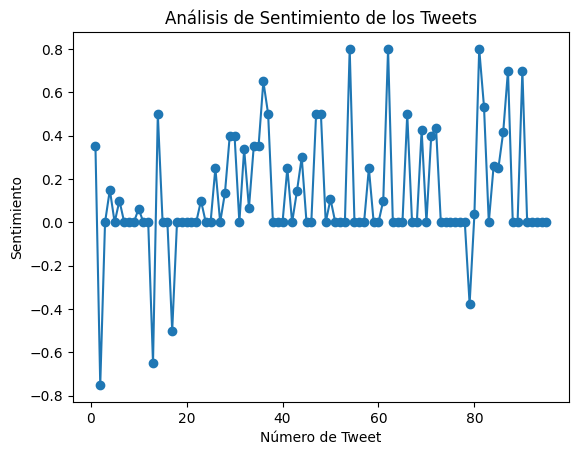

In [96]:
import matplotlib.pyplot as plt

# Crear lista de números de tweet
tweet_numbers = range(1, len(sentiments) + 1)

# Graficar los resultados
plt.plot(tweet_numbers, sentiments, marker='o')
plt.xlabel('Número de Tweet')
plt.ylabel('Sentimiento')
plt.title('Análisis de Sentimiento de los Tweets')
plt.show()


#ahora vamos por un análisis de emociones en ptyhon. 

Primero vamos a descargas elementos y preparar el entorno de trabajo

In [111]:
import nltk
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Ahora vamos a crear una función que maée los sentimientos 

In [112]:
def map_sentiment_to_emotion(sentiment):
    if sentiment >= 0.1:
        return 'Positive'
    elif sentiment <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'


ahora mapeamos las emociones

In [113]:
def analyze_sentiment_and_emotions(tweet_text):
    sentiment_scores = []
    emotions = []
    tokens = nltk.word_tokenize(tweet_text)
    
    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        
        if synsets:
            sentiment = sum([synset.pos_score() - synset.neg_score() for synset in synsets]) / len(synsets)
            emotion = map_sentiment_to_emotion(sentiment)
            sentiment_scores.append(sentiment)
            emotions.append(emotion)
    
    return sentiment_scores, emotions

ahora vamos a trabajar según lo que hemos creado en el documento de texto que tenemos

In [114]:
for tweet in public_tweets:
    tweet_text = tweet.text
    sentiment_scores, emotions = analyze_sentiment_and_emotions(tweet_text)

    tokens = nltk.word_tokenize(tweet_text)
    for i in range(len(sentiment_scores)):
        print(f"Word: {tokens[i]}, Sentiment: {sentiment_scores[i]}, Emotion: {emotions[i]}")


Word: @, Sentiment: -0.1, Emotion: Negative
Word: BillyM2k, Sentiment: 0.0, Emotion: Neutral
Word: Happens, Sentiment: 0.2916666666666667, Emotion: Positive
Word: to, Sentiment: 0.08333333333333333, Emotion: Neutral
Word: @, Sentiment: 0.24166666666666667, Emotion: Positive
Word: @, Sentiment: 0.009615384615384616, Emotion: Neutral
Word: aaronsibarium, Sentiment: -0.125, Emotion: Negative
Word: This, Sentiment: 0.02976190476190476, Emotion: Neutral
Word: is, Sentiment: 0.008928571428571428, Emotion: Neutral
Word: crazy, Sentiment: 0.025, Emotion: Neutral
Word: –, Sentiment: -0.006944444444444444, Emotion: Neutral
Word: lives, Sentiment: 0.125, Emotion: Positive
Word: are, Sentiment: 0.11538461538461539, Emotion: Positive
Word: on, Sentiment: 0.0, Emotion: Neutral
Word: the, Sentiment: 0.009615384615384616, Emotion: Neutral
Word: line, Sentiment: -0.017857142857142856, Emotion: Neutral
Word: !, Sentiment: -0.3125, Emotion: Negative
Word: The, Sentiment: 0.0, Emotion: Neutral
Word: woke,